<a href="https://colab.research.google.com/github/AmilcarArmmand/CSC-481_Project/blob/main/BreakHis_481_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Dropout, Rescaling,GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [15]:
file_path="/content/drive/MyDrive/BreaKHis_v1/BreaKHis_v1/histology_slides/breast"
batch_size = 32
image_size = 224,224
#preprocessing the image
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_data = train_datagen.flow_from_directory(
    file_path,
    target_size=image_size,
    batch_size=32,
    class_mode='binary',  # 'categorical' for multi-class
    subset='training'
)

validation_data = train_datagen.flow_from_directory(
    file_path,
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 6328 images belonging to 2 classes.
Found 1581 images belonging to 2 classes.


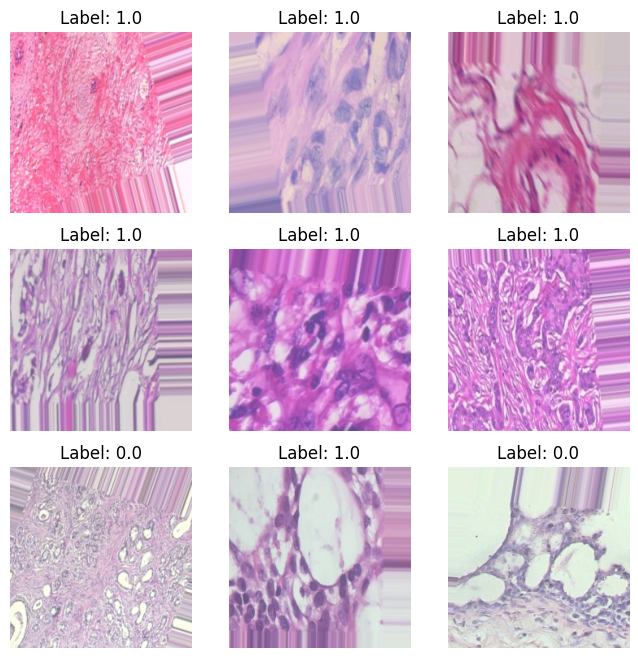

In [19]:
#Visialization
images, labels = next(train_data)
plt.figure(figsize=(8,8))
#for images, labels in train_data.take(1):
for i in range(9):
  ax= plt.subplot(3,3, i+1)
  plt.imshow(images[i]) #.numpy().astype('uint8'))
  plt.title(f"Label: {labels[i]}")
  #plt.title(train_data.class_names[int(labels[i].numpy())])

  plt.axis('off')
plt.show()

In [4]:
#preprocessing
#image_scaling= Rescaling(1./255)
#train_data= train_data.map(lambda x, y:(image_scaling(x), y))

In [23]:
#cnn from scratch
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # 'categorical_crossentropy' for multi-class
    metrics=['accuracy']
)

history_cnn = model_cnn.fit(
    train_data,
    validation_data=validation_data,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.7339 - loss: 0.7010 - val_accuracy: 0.8419 - val_loss: 0.3793
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.8161 - loss: 0.4604 - val_accuracy: 0.8457 - val_loss: 0.3872
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.8081 - loss: 0.4543 - val_accuracy: 0.8368 - val_loss: 0.4197
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.8263 - loss: 0.4450 - val_accuracy: 0.8159 - val_loss: 0.4452
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.8423 - loss: 0.4078 - val_accuracy: 0.7830 - val_loss: 0.5343
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.8318 - loss: 0.4301 - val_accuracy: 0.7565 - val_loss: 0.7564
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.8134 - loss: 0.4671 - val_accuracy: 0.8387 - val_loss: 0.4257
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.8446 - loss: 0.3899 - val_accu

In [28]:
model_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,507,269 (127.82 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,338,180 (85.21 MB)

In [32]:
# Load ResNet50 (pre-trained on ImageNet)
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze the base model
base_model.trainable = False

# Add custom layers
model_resnet = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # 'softmax' for multi-class
])

model_resnet.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_resnet = model_resnet.fit(
    train_data,
    validation_data=validation_data,
    epochs=10
)

Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 235s 1s/step - accuracy: 0.6586 - loss: 0.6557 - val_accuracy: 0.6863 - val_loss: 0.6204
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.6802 - loss: 0.6322 - val_accuracy: 0.6863 - val_loss: 0.6194
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.6872 - loss: 0.6246 - val_accuracy: 0.6863 - val_loss: 0.6173
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.6837 - loss: 0.6251 - val_accuracy: 0.6863 - val_loss: 0.6184
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.6846 - loss: 0.6198 - val_accuracy: 0.6863 - val_loss: 0.6192
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.6762 - loss: 0.6310 - val_accuracy: 0.6863 - val_loss: 0.6211
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.6921 - loss: 0.6207 - val_accuracy: 0.6863 - val_loss: 0.6172
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.6942 - loss: 0.6117 - val_accu

In [33]:
model_resnet.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,374,917 (92.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 524,804 (2.00 MB)

In [ ]:
# Unfreeze top layers of ResNet50
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

model_resnet.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # Lower learning rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_resnet_finetuned = model_resnet.fit(
    train_data,
    validation_data=validation_data,
    epochs=5  # Fewer epochs for fine-tuning
)

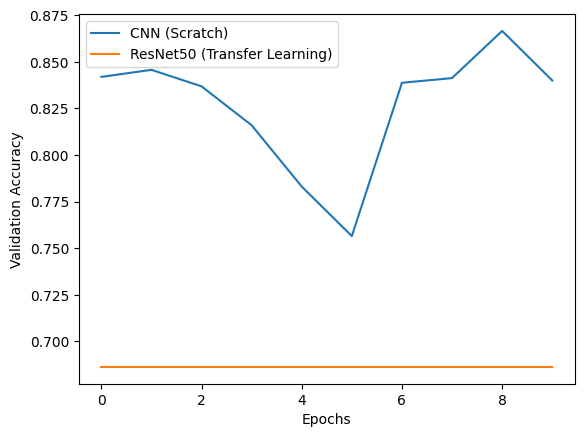

In [34]:
#Comparing the models

# Plot CNN from scratch
plt.plot(history_cnn.history['val_accuracy'], label='CNN (Scratch)')
# Plot ResNet50
plt.plot(history_resnet.history['val_accuracy'], label='ResNet50 (Transfer Learning)')
# Plot Fine-Tuned ResNet50
#plt.plot(history_resnet_finetuned.history['val_accuracy'], label='ResNet50 (Fine-Tuned)')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

In [35]:
import pandas as pd

# Extract best validation accuracy for each model
best_cnn_val_acc = max(history_cnn.history['val_accuracy'])
best_resnet_val_acc = max(history_resnet.history['val_accuracy'])

# Create a summary table
results = pd.DataFrame({
    'Model': ['CNN (Scratch)', 'ResNet50 (Transfer Learning)'],
    'Best Validation Accuracy': [best_cnn_val_acc, best_resnet_val_acc],
    'Training Accuracy (Final)': [history_cnn.history['accuracy'][-1], history_resnet.history['accuracy'][-1]],
    'Overfitting Gap': [
        history_cnn.history['accuracy'][-1] - best_cnn_val_acc,
        history_resnet.history['accuracy'][-1] - best_resnet_val_acc
    ]
})

print(results)

                          Model  Best Validation Accuracy  \
0                 CNN (Scratch)                  0.866540   
1  ResNet50 (Transfer Learning)                  0.686275   

   Training Accuracy (Final)  Overfitting Gap  
0                   0.829488        -0.037052  
1                   0.686473         0.000198  
